# Outbrain Click Prediction

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as preprocess
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Reading the file From Github Repo

In [2]:
df = pd.read_csv("training.csv")

In [3]:
print (df)

                ID          datetime     siteid  offerid  category  merchant  \
0        IDsrk7SoW  14-01-2017 09:42  4709696.0   887235     17714  20301556   
1        IDmMSxHur  18-01-2017 17:50  5189467.0   178235     21407   9434818   
2        IDVLNN0Ut  11-01-2017 12:46    98480.0   518539     25085   2050923   
3        ID32T6wwQ  17-01-2017 10:18  8896401.0   390352     40339  72089744   
4        IDqUShzMg  14-01-2017 16:02  5635120.0   472937     12052  39507200   
5        IDjO9XQ1Z  14-01-2017 12:08  2729292.0   961176     33638  47079934   
6        IDUuVWVrO  12-01-2017 13:07  7007059.0   664666     68847  58604466   
7        IDFnmhUgG  13-01-2017 05:58  7295565.0   144797     33638  23981625   
8        IDeFBJfzG  18-01-2017 13:00  2116058.0   376073     15912  30860214   
9        IDmyijsRf  14-01-2017 12:38  5329483.0   952097     89680  74363610   
10       IDGQGYgdk  14-01-2017 11:06  6436389.0   949077     76239  65017662   
11       IDeS7iMpY  12-01-2017 03:36  64

In [4]:
df_zero = df[df['click']==0]
df_one = df[df['click']==1]
df_zero = df_zero[:2500]
df_one = df_one[:2500]
print(len(df_zero))
print(len(df_one))

2500
2500


In [22]:
df_zero.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,14-01-2017 09:42,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,18-01-2017 17:50,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,11-01-2017 12:46,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,17-01-2017 10:18,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,14-01-2017 16:02,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [23]:
df_combined = df_one.append(df_zero,ignore_index=True)
print (df_combined)

             ID          datetime     siteid  offerid  category  merchant  \
0     IDdPZWVCs  15-01-2017 21:43  6718234.0   433512     43612  57517812   
1     IDU8ukCsv  10-01-2017 15:28   469603.0   385750     93286   7122654   
2     IDfEQxvi3  14-01-2017 19:01  5369414.0   513860     27655  92826840   
3     IDbF2aKjs  11-01-2017 19:21  6005717.0   956737      1678  60293830   
4     IDEgpeME8  16-01-2017 14:29  7979331.0   501647     68947  58321067   
5     ID0SqwVVC  17-01-2017 00:04  2092870.0   400635     43897  46512126   
6     IDN439rpK  20-01-2017 12:49    94250.0   527842     23576  16150900   
7     IDd9dRKG1  15-01-2017 01:00  7885100.0   913591     15912   7181598   
8     IDA9DGtL9  15-01-2017 06:30  9335708.0   188867      3643    555603   
9     IDLM0u0QM  16-01-2017 02:56  5571806.0   103249     40339  43452411   
10    IDY7aCYRs  13-01-2017 13:25  8476528.0   945081     41706   4000296   
11    IDLBtW0hS  13-01-2017 20:05  2148269.0   995962     80554   7122654   

In [29]:
df_new = shuffle(df_combined)
print(df_new)

             ID          datetime     siteid  offerid  category  merchant  \
3422  IDR2SDkSa  12-01-2017 10:35  6725686.0   706864     35368  90093962   
2823  IDX59aNVm  15-01-2017 11:37  3872686.0   325317      6906  99510044   
561   IDMuKPp5b  20-01-2017 18:55        NaN   343856     17714  27723861   
626   IDYj7Ftgr  17-01-2017 19:51  2341829.0   944752      6906  99510044   
431   IDQlsG19F  16-01-2017 22:17   541831.0    88210     33287  86084476   
2224  IDcTInpMe  12-01-2017 20:24  2342308.0   373155     41706  72780377   
53    IDWF3gLDC  13-01-2017 21:42        NaN   531171     43612  41441342   
2370  ID2wHehTy  18-01-2017 20:07        NaN   743867      6906  99510044   
1489  IDNlOsOFP  11-01-2017 17:45  5084392.0   746098     64452  92640312   
732   IDP5qBoB5  11-01-2017 01:02  7465632.0   948886      6906  98830533   
4842  IDr2YaYWM  15-01-2017 07:05  3632094.0   758174     76239  17990842   
4310  IDYlQMtim  15-01-2017 17:00  5331225.0   140420      6906  99510044   

In [30]:
df_new['click'].value_counts()

1    2500
0    2500
Name: click, dtype: int64

In [31]:
df_new.isnull().sum()

ID               0
datetime         0
siteid         515
offerid          0
category         0
merchant         0
countrycode      0
browserid      267
devid          761
click            0
dtype: int64

In [32]:
print((df_new["siteid"].isnull().sum())/len(df_new["siteid"])) 
print((df_new["browserid"].isnull().sum())/len(df_new["browserid"]))
print((df_new["devid"].isnull().sum())/len(df_new["devid"]))
                                       

0.103
0.0534
0.1522


In [11]:
df_new['siteid'].mode()
df_new['browserid'].mode()
df_new['devid'].mode()

0    Mobile
dtype: object

In [33]:
df_new["siteid"]=df_new["siteid"].fillna(1466152.0)
df_new["browserid"]=df_new["browserid"].fillna('Edge')
df_new["devid"]=df_new["devid"].fillna('Mobile')
print(df_new)

             ID          datetime     siteid  offerid  category  merchant  \
3422  IDR2SDkSa  12-01-2017 10:35  6725686.0   706864     35368  90093962   
2823  IDX59aNVm  15-01-2017 11:37  3872686.0   325317      6906  99510044   
561   IDMuKPp5b  20-01-2017 18:55  1466152.0   343856     17714  27723861   
626   IDYj7Ftgr  17-01-2017 19:51  2341829.0   944752      6906  99510044   
431   IDQlsG19F  16-01-2017 22:17   541831.0    88210     33287  86084476   
2224  IDcTInpMe  12-01-2017 20:24  2342308.0   373155     41706  72780377   
53    IDWF3gLDC  13-01-2017 21:42  1466152.0   531171     43612  41441342   
2370  ID2wHehTy  18-01-2017 20:07  1466152.0   743867      6906  99510044   
1489  IDNlOsOFP  11-01-2017 17:45  5084392.0   746098     64452  92640312   
732   IDP5qBoB5  11-01-2017 01:02  7465632.0   948886      6906  98830533   
4842  IDr2YaYWM  15-01-2017 07:05  3632094.0   758174     76239  17990842   
4310  IDYlQMtim  15-01-2017 17:00  5331225.0   140420      6906  99510044   

In [34]:
df_new.isnull().sum()

ID             0
datetime       0
siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
dtype: int64

In [35]:
df_new.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
3422,IDR2SDkSa,12-01-2017 10:35,6725686.0,706864,35368,90093962,e,Mozilla,Desktop,0
2823,IDX59aNVm,15-01-2017 11:37,3872686.0,325317,6906,99510044,a,Firefox,Mobile,0
561,IDMuKPp5b,20-01-2017 18:55,1466152.0,343856,17714,27723861,a,Google Chrome,Mobile,1
626,IDYj7Ftgr,17-01-2017 19:51,2341829.0,944752,6906,99510044,c,InternetExplorer,Desktop,1
431,IDQlsG19F,16-01-2017 22:17,541831.0,88210,33287,86084476,c,Google Chrome,Mobile,1


In [36]:
df_new['datetime'] = pd.to_datetime(df_new['datetime'])
df_new['year']= df_new['datetime'].dt.year
df_new['month']= df_new['datetime'].dt.month
df_new['day']= df_new['datetime'].dt.day
df_new['hour']= df_new['datetime'].dt.hour
df_new['min']= df_new['datetime'].dt.minute

# Checking the correlation of columns 

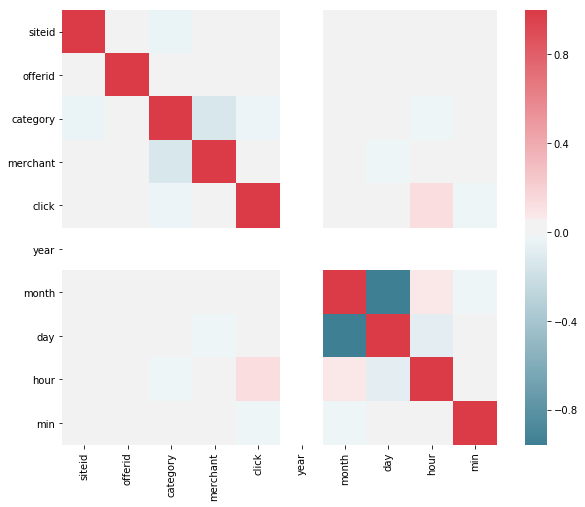

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [39]:
dummies =  pd.get_dummies(df_new,columns=['datetime','siteid','offerid','category','merchant','countrycode','browserid','devid'])
dummies.head()

,ID,click,year,month,day,hour,min,datetime_2017-01-13 00:00:00,datetime_2017-01-13 00:07:00,datetime_2017-01-13 00:17:00,...,browserid_IE,browserid_Internet Explorer,browserid_InternetExplorer,browserid_Mozilla,browserid_Mozilla Firefox,browserid_Opera,browserid_Safari,devid_Desktop,devid_Mobile,devid_Tablet
3422,IDR2SDkSa,0,2017,12,1,10,35,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2823,IDX59aNVm,0,2017,1,15,11,37,0,0,0,...,0,0,0,0,0,0,0,0,1,0
561,IDMuKPp5b,1,2017,1,20,18,55,0,0,0,...,0,0,0,0,0,0,0,0,1,0
626,IDYj7Ftgr,1,2017,1,17,19,51,0,0,0,...,0,0,1,0,0,0,0,1,0,0
431,IDQlsG19F,1,2017,1,16,22,17,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
y = dummies['click']
final = dummies.drop(['ID','click'],axis='columns')
y.head()

3422    0
2823    0
561     1
626     1
431     1
Name: click, dtype: int64

In [41]:
feature_cols=final.columns
print(feature_cols)

Index(['year', 'month', 'day', 'hour', 'min', 'datetime_2017-01-13 00:00:00',
       'datetime_2017-01-13 00:07:00', 'datetime_2017-01-13 00:17:00',
       'datetime_2017-01-13 01:07:00', 'datetime_2017-01-13 01:24:00',
       ...
       'browserid_IE', 'browserid_Internet Explorer',
       'browserid_InternetExplorer', 'browserid_Mozilla',
       'browserid_Mozilla Firefox', 'browserid_Opera', 'browserid_Safari',
       'devid_Desktop', 'devid_Mobile', 'devid_Tablet'],
      dtype='object', length=13294)


In [42]:
X= final[feature_cols]
print(X.head())
print("*********************************************************")
print(y.head())

      year  month  day  hour  min  datetime_2017-01-13 00:00:00  \
3422  2017     12    1    10   35                             0   
2823  2017      1   15    11   37                             0   
561   2017      1   20    18   55                             0   
626   2017      1   17    19   51                             0   
431   2017      1   16    22   17                             0   

      datetime_2017-01-13 00:07:00  datetime_2017-01-13 00:17:00  \
3422                             0                             0   
2823                             0                             0   
561                              0                             0   
626                              0                             0   
431                              0                             0   

      datetime_2017-01-13 01:07:00  datetime_2017-01-13 01:24:00  \
3422                             0                             0   
2823                             0                  

In [43]:
normalize_feature = preprocess.scale(final)
normalize_feature.shape

(5000, 13294)

# Splitting the dataset into training and testing set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(4000, 13294)
(4000,)
(1000, 13294)
(1000,)


In [55]:
X_train.shape

(4000, 13294)

# Applying PCA 

In [56]:
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
X_Train_new = my_pca. fit_transform(X_train)
X_Test_new = my_pca. fit_transform(X_test)
print('X_train' , X_Train_new.shape)
print('X_test', X_Test_new.shape)


X_train (4000, 50)
X_test (1000, 50)


In [29]:
a = my_pca.explained_variance_ratio_.sum() 
print(a)

0.990139210770408


# Creating models using different Machine Learning Algorithms and fit them with Training data

In [57]:
dec_tree=DecisionTreeClassifier() 
log_reg=LogisticRegression()
k=3
knn=KNeighborsClassifier(n_neighbors=k)
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [58]:
log_reg.fit(X_train,y_train)
dec_tree.fit(X_train,y_train)
knn.fit(X_train,y_train)
my_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

# Testing the fitted model on Training Set

In [59]:
y_perdict_regression =log_reg.predict(X_test)
y_perdict_tree =dec_tree.predict(X_test)
y_predict_knn= knn.predict(X_test)
predict_my_RandomForest=my_RandomForest.predict(X_test)

# Accuracy score of all the trained model

In [60]:
score_regression=accuracy_score(y_test,y_perdict_regression)
score_tree=accuracy_score(y_test, y_perdict_tree)
score_knn=accuracy_score(y_test, y_predict_knn)
my_RandomForest_accuracy=accuracy_score(y_test,predict_my_RandomForest)

print('Random Forest ',my_RandomForest_accuracy)
print('Logistic Regression',score_regression)
print('Decision Tree',score_tree)
print('KNN',score_knn)

Random Forest  0.884
Logistic Regression 0.877
Decision Tree 0.87
KNN 0.75


# True Positive and False Positive

In [61]:
fpr_reg, tpr_reg, thresholds_reg = metrics.roc_curve(y_test.ravel(), y_perdict_regression.ravel())
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_test.ravel(), y_predict_knn.ravel())
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(y_test.ravel(), y_perdict_tree.ravel())
fpr_rtree, tpr_rtree, thresholds_rtree = metrics.roc_curve(y_test.ravel(), predict_my_RandomForest.ravel())
print("LogisticRegression")
print(fpr_reg)
print(tpr_reg)
print("\n\n\n")
print("KNN")
print(fpr_knn)
print(tpr_knn)
print("\n\n\n")
print("Decision Tree")
print(fpr_tree)
print(tpr_tree)
print("\n\n\n")
print("Random Forest")
print(fpr_rtree)
print(tpr_rtree)

LogisticRegression
[0.         0.14031621 1.        ]
[0.         0.89473684 1.        ]




KNN
[0.         0.25494071 1.        ]
[0.         0.75506073 1.        ]




Decision Tree
[0.         0.14426877 1.        ]
[0.         0.88461538 1.        ]




Random Forest
[0.         0.11067194 1.        ]
[0.         0.87854251 1.        ]


In [62]:
# AUC:
AUC_reg = metrics.auc(fpr_reg, tpr_reg)
AUC_tree = metrics.auc(fpr_tree, tpr_tree)
AUC_knn = metrics.auc(fpr_knn, tpr_knn)
AUC_rtree = metrics.auc(fpr_rtree, tpr_rtree)
print("AUC Regression")
print(AUC_reg)
print("\n\n\n")
print("AUC Tree")
print(AUC_tree)
print("\n\n\n")
print("AUC KNN")
print(AUC_knn)
print("\n\n\n")
print("AUC Random Forest")
print(AUC_knn)

AUC Regression
0.8772103182858333




AUC Tree
0.8701733049559136




AUC KNN
0.7500600086412443




AUC Random Forest
0.7500600086412443


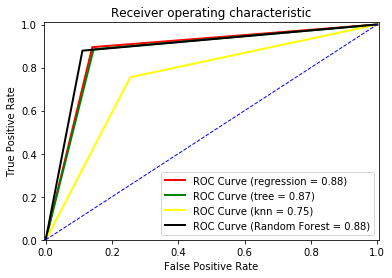

In [63]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_reg, tpr_reg, color='red', lw=2, 
         label='ROC Curve (regression = %0.2f)' % AUC_reg)

plt.plot(fpr_tree, tpr_tree, color='green', lw=2, 
         label='ROC Curve (tree = %0.2f)' % AUC_tree)

plt.plot(fpr_knn, tpr_knn, color='yellow', lw=2, 
         label='ROC Curve (knn = %0.2f)' % AUC_knn)

plt.plot(fpr_rtree, tpr_rtree, color='black', lw=2, 
         label='ROC Curve (Random Forest = %0.2f)' % AUC_rtree)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])


# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
print("\n\n\n")
plt.show()

In [64]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_perdict_regression)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

0.3507135583350036


# Plotting of Predicition and Target Label for Logistic Regression.

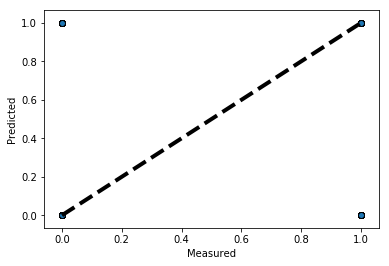

In [65]:
y_predict_ln = log_reg.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Cross - Validation in sklearn
## 1. Logistic Regression


In [66]:
accuracy_list = cross_val_score(log_reg,X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.888 0.9   0.918 0.908 0.904 0.878 0.904 0.926 0.894 0.882]


In [67]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()
print("Orginial Accuracy",score_regression)
print("Cross-Validation Accuracy",accuracy_cv)

Orginial Accuracy 0.877
Cross-Validation Accuracy 0.9001999999999999


## 2. Decision Tree

In [68]:
#Cross-validation for Decision Tree
accuracy_list = cross_val_score(dec_tree, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.896 0.882 0.894 0.92  0.898 0.86  0.914 0.92  0.888 0.868]


In [69]:
accuracy_cv = accuracy_list.mean()
print("Orginial Accuracy ==>",score_tree)
print("Cross-Validation Accuracy ==>",accuracy_cv)

Orginial Accuracy ==> 0.87
Cross-Validation Accuracy ==> 0.8940000000000001


## 3. KNN

In [70]:
#Cross-validation for KNN
accuracy_list = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.774 0.77  0.76  0.788 0.776 0.776 0.79  0.762 0.79  0.744]


In [71]:
accuracy_cv = accuracy_list.mean()
print("Orginial Accuracy ==>",score_knn)
print("Cross-Validation Accuracy ==>",accuracy_cv)

Orginial Accuracy ==> 0.75
Cross-Validation Accuracy ==> 0.7729999999999999


## 4.  Random Forest

In [72]:
#Cross-validation for Random Forest
accuracy_list = cross_val_score(my_RandomForest, X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.902 0.904 0.908 0.914 0.902 0.886 0.914 0.932 0.9   0.868]


In [73]:
accuracy_cv = accuracy_list.mean()
print("Orginial Accuracy ==>",my_RandomForest_accuracy)
print("Cross-Validation Accuracy ==>",accuracy_cv)

Orginial Accuracy ==> 0.884
Cross-Validation Accuracy ==> 0.9030000000000001


# SVM Implementation

In [74]:
svm_model=svm.SVC(C=5, kernel='rbf', gamma=0.0005, random_state=1)
svm_model.fit(X_Train_new, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
svm_predict=svm_model.predict(X_Test_new)
score_svm = accuracy_score(y_test, svm_predict)
print(score_svm)

0.88


In [76]:
confusion_svm = metrics.confusion_matrix(y_test, svm_predict)
print("Confusion matrix:")
print(confusion_svm)

Confusion matrix:
[[448  58]
 [ 62 432]]


In [77]:
# CV:
accuracy_list = cross_val_score(svm_model,X, y, cv=10, scoring='accuracy')
print(accuracy_list)

[0.888 0.904 0.912 0.906 0.908 0.882 0.914 0.928 0.908 0.884]


In [78]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()
print(accuracy_cv)

0.9034000000000001


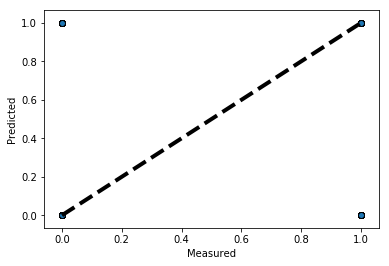

In [79]:
y_predict_ln = svm_model.predict(X_Test_new)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [80]:
# Calculating "Mean Square Error" (MSE):
mse2 = metrics.mean_squared_error(y_test, svm_predict)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse2 = np.sqrt(mse2)

print(rmse2)

0.34641016151377546
